In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [14]:
x = 6 * np.random.rand(200,1)-3
y = 2 + 0.9*x + 0.8*x**2 + np.random.randn(200,1)
# y = 2+0.9x+0.8x^2+noise

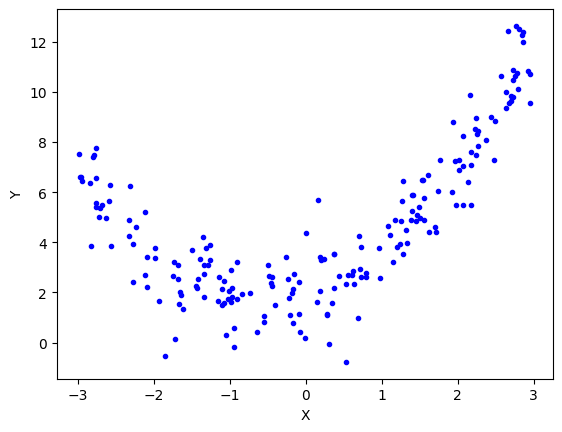

In [15]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_predict = lr.predict(x_test)
r2_score_lr = r2_score(y_test,y_predict)
print("R2score is", r2_score_lr)

R2score is 0.16538402443879696


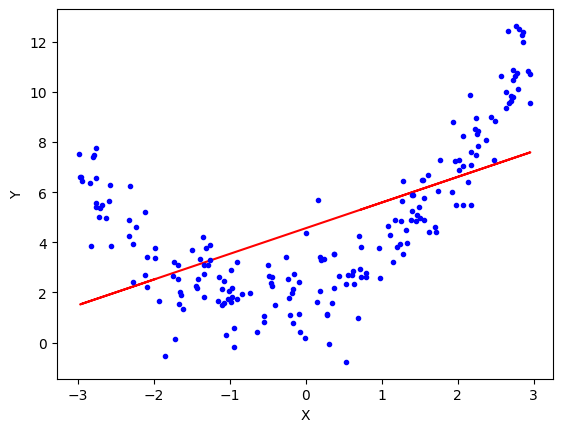

In [22]:
plt.plot(x_train, lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Applying polynomial regression

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [25]:
print(x_train[0])

[0.73050773]


In [26]:
print(x_train_poly[0])

[1.         0.73050773 0.53364155]


In [28]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [29]:
y_predict = lr.predict(x_test_poly)
r2_score_lr = r2_score(y_test,y_predict)
print("R2score is", r2_score_lr)

R2score is 0.8398387019354987


In [30]:
print(lr.coef_)

[[0.         0.87580943 0.82048148]]


In [31]:
print(lr.intercept_)

[1.93067622]


In [33]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

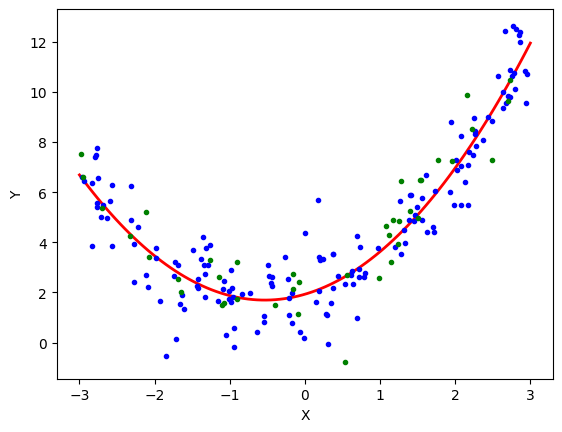

In [35]:
plt.plot (x_new, y_new, "-r", linewidth=2, label="Predictions")
plt.plot(x_train,y_train,'b.',label="Training data")
plt.plot(x_test,y_test,'g.',label="Testing data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [42]:
def polynomial_regression(degree):
    x_new=np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

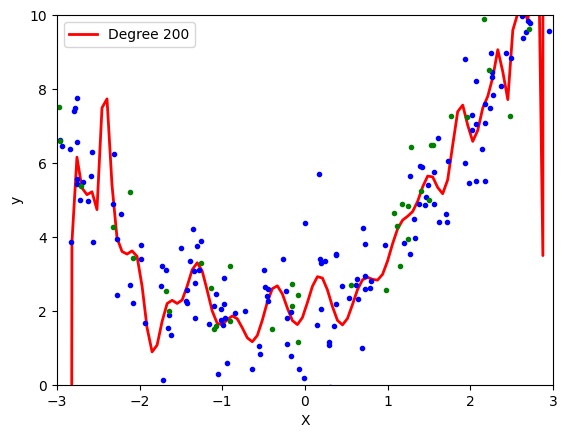

In [43]:
polynomial_regression(200)

In [44]:
poly.powers_

array([[0],
       [1],
       [2]])

visualize 3d plot


In [45]:
# 3D polynomial regression

x = 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [46]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(), y=y.ravel(), z = z.ravel())
fig.show()